# Airbnb First Booking Prediction

## Features
**gender**<br>
**age**<br>
**signup_method**<br>
**signup_flow**: the page a user came to signup up from<br>
**language**: international language preference<br>
**affiliate_channel**: what kind of paid marketing<br>
**affiliate_provider**: where the marketing is e.g. google, craigslist, other<br>
**first_affiliate_tracked**: whats the first marketing the user interacted with before the signing up<br>
**signup_app**<br>
**first_device_type**<br>
**first_browser**<br>
**country_destination**<br>

## Objective
For this project, we are trying to predict whether a potential new customer will book his or her first room within a month after he or she browses the Airbnb website. Our data does not come with a target variable, so we first need to define one. In the EDA notebook, we used the difference between the timestamps of first_activity and date_first_booking to create a target variable column called book_within_a_month. The target variable comes with two labels, ‘Y’ for will book within a month and ‘N’ for will not book within a month. Our goal is to find all potential customers that are classified as ‘N’, and then send them promotion codes to encourage them to book.

## Metrics
Recall: The false negative here means the customers that we predicted will not book a room actually book a room. Since we don't want to waste money on sending promotion codes to the prospects who will convert into customers, we would want the false negative to be low. Therefore, we want high recall score.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#import pickle from the eda notebook
import pickle
airbnb_booking = pd.read_pickle("./airbnb_data.pkl")
# pd.read_pickle(‘airbnb_data.pkl’, compression=‘infer’)

In [1024]:
airbnb_booking.head()

,age,signup_flow,book_within_a_month,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Other,...,first_device_type_iPad,first_device_type_iPhone,first_browser_Android Browser,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Firefox,first_browser_IE,first_browser_Mobile Safari,first_browser_Other,first_browser_Safari
0,28,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
airbnb_booking.age=airbnb_booking.age.astype(int)

In [8]:
airbnb_booking=pd.get_dummies(airbnb_booking)

In [9]:
X, y = airbnb_booking.loc[:, airbnb_booking.columns != 'book_within_a_month'], airbnb_booking['book_within_a_month']
print(X.shape)
print(y.shape)

(210522, 52)
(210522,)


In [10]:
y.value_counts()
#we can see that 89.6% of data are predicted as booked within a month

1.0    188635
0.0     21887
Name: book_within_a_month, dtype: int64

Well, that's imbalanced. If we guessed all potential customers belonged to class 1 (booked within a month), we would be right 188635/(188635 + 21887) = 89.6% of the time! If accuracy is the metric, we have a very simple model that does very well.

## Class Imbalance -- Oversampling

We will run smote and adasyn on the train set and see if that will help getting better result.

In [11]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=42, stratify = y_train)

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [12]:
X_smoted_train, y_smoted_train = SMOTE(random_state=42).fit_sample(X_train, y_train)
X_smoted_val, y_smoted_val = SMOTE(random_state=42).fit_sample(X_val, y_val)

X_adasyn_train, y_adasyn_train = ADASYN(random_state=42).fit_sample(X_train, y_train)
X_adasyn_val, y_adasyn_val = ADASYN(random_state=42).fit_sample(X_val, y_val)

# Models Building

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
clf = RandomForestClassifier(n_estimators=64,n_jobs=-1)
clf.fit(X_smoted_train, y_smoted_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
hyper_param_grid = {'max_depth': [i for i in range(30,40)],
                   'n_estimators': [100]}

rf = GridSearchCV(RandomForestClassifier(), hyper_param_grid, n_jobs = -1, cv = 3, verbose = 1)


rf.fit(X_smoted_train, y_smoted_train) 

rf.cv_results_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.0min finished


{'mean_fit_time': array([ 81.919849  ,  92.24817801, 102.88589096, 112.16505369,
         96.67397896,  86.73121635,  86.31289784,  95.6712153 ,
        118.82958007, 100.66936803]),
 'std_fit_time': array([ 0.74765717,  8.04938374,  6.71963526,  1.7507195 ,  0.54124927,
         6.55007776,  6.8494569 ,  0.6154613 ,  0.89278692, 10.09103023]),
 'mean_score_time': array([6.83589411, 7.59059906, 8.18256203, 7.89645155, 7.41336664,
        6.33299597, 6.80385741, 9.63370832, 9.900014  , 6.17176469]),
 'std_score_time': array([0.27525799, 0.54512757, 0.44126262, 1.4332373 , 0.33040172,
        0.97262993, 1.50147051, 0.71041025, 0.13725051, 2.64818906]),
 'param_max_depth': masked_array(data=[30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
    

In [52]:
RF = RandomForestClassifier(n_estimators=100, max_features=39)  
RF.fit(X_smoted_train, y_smoted_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=39, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_predict_rf = RF.predict(X_smoted_val)

In [54]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_smoted_val, y_predict_rf))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84     37727
         1.0       0.83      0.85      0.84     37727

    accuracy                           0.84     75454
   macro avg       0.84      0.84      0.84     75454
weighted avg       0.84      0.84      0.84     75454



In [55]:
print("The score for RF_SMOTE is")
print("Training: {:6.2f}%".format(100*RF.score(X_smoted_train, y_smoted_train)))
print("Test set: {:6.2f}%".format(100*RF.score(X_smoted_val, y_smoted_val)))

The score for RF_SMOTE is
Training:  90.00%
Test set:  83.74%


In [56]:
#adasyn
RF.fit(X_adasyn_train, y_adasyn_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=39, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_predict_rf_ada = RF.predict(X_adasyn_val) 

In [58]:
print(metrics.classification_report(y_adasyn_val, y_predict_rf_ada))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     36756
         1.0       0.85      0.85      0.85     37727

    accuracy                           0.84     74483
   macro avg       0.84      0.84      0.84     74483
weighted avg       0.84      0.84      0.84     74483



In [59]:
print("The score for RF_ADASYN is")
print("Training: {:6.2f}%".format(100*RF.score(X_adasyn_train, y_adasyn_train)))
print("Test set: {:6.2f}%".format(100*RF.score(X_adasyn_val, y_adasyn_val)))

The score for RF_ADASYN is
Training:  89.46%
Test set:  84.36%


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_smoted_train, y_smoted_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [61]:
y_pred_dt = DT.predict(X_smoted_val)    

In [62]:
print(metrics.classification_report(y_smoted_val, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82     37727
         1.0       0.81      0.83      0.82     37727

    accuracy                           0.82     75454
   macro avg       0.82      0.82      0.82     75454
weighted avg       0.82      0.82      0.82     75454



In [63]:
DT.fit(X_adasyn_train, y_adasyn_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [64]:
y_pred_dt_ada = DT.predict(X_adasyn_val) 

In [65]:
print(metrics.classification_report(y_adasyn_val, y_pred_dt_ada))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82     36756
         1.0       0.83      0.82      0.82     37727

    accuracy                           0.82     74483
   macro avg       0.82      0.82      0.82     74483
weighted avg       0.82      0.82      0.82     74483



## KNN Classification

In [ ]:
# #knn grid search
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# knn_param = {'n_neighbors' : range(1,10), 
#              'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
#              'weights':['uniform', 'distance']}
# knn = KNeighborsClassifier()
# grid_srch = RandomizedSearchCV(knn, knn_param, cv=5, scoring='roc_auc', n_jobs=-1, iid=True)
# grid_srch.fit(X_smoted_train, y_smoted_train)
# print(grid_srch.best_score_)
# print(grid_srch.best_params_)

In [66]:
# fit on train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_smoted_train, y_smoted_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
# test on test
y_pred_knn = knn.predict(X_smoted_val)

In [68]:
print(metrics.classification_report(y_smoted_val, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.75      0.52      0.61     37727
         1.0       0.63      0.82      0.71     37727

    accuracy                           0.67     75454
   macro avg       0.69      0.67      0.66     75454
weighted avg       0.69      0.67      0.66     75454



In [69]:
print("The score for kNN_SMOTE is")
print("Training: {:6.2f}%".format(100*knn.score(X_smoted_train, y_smoted_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_smoted_val, y_smoted_val)))

The score for kNN_SMOTE is
Training:  82.43%
Test set:  67.13%


In [70]:
# fit on train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_adasyn_train, y_adasyn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
# test on test
y_pred_knn_ada = knn.predict(X_adasyn_val)

In [72]:
print(metrics.classification_report(y_adasyn_val, y_pred_knn_ada))

              precision    recall  f1-score   support

         0.0       0.74      0.47      0.57     36756
         1.0       0.62      0.84      0.71     37727

    accuracy                           0.65     74483
   macro avg       0.68      0.65      0.64     74483
weighted avg       0.68      0.65      0.64     74483



In [73]:
print("The score for kNN_ADASYN is")
print("Training: {:6.2f}%".format(100*knn.score(X_smoted_train, y_smoted_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_smoted_val, y_smoted_val)))

The score for kNN_ADASYN is
Training:  79.70%
Test set:  66.18%


##  Logistic Regression

In [74]:
lr=LogisticRegression(C=1)
lr.fit(X_smoted_train, y_smoted_train)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_predict_lr = lr.predict(X_smoted_val)

In [76]:
print(metrics.classification_report(y_smoted_val, y_predict_lr))

              precision    recall  f1-score   support

         0.0       0.63      0.70      0.66     37727
         1.0       0.66      0.58      0.62     37727

    accuracy                           0.64     75454
   macro avg       0.64      0.64      0.64     75454
weighted avg       0.64      0.64      0.64     75454



In [77]:
lr.fit(X_adasyn_train, y_adasyn_train)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_predict_lr_ada = lr.predict(X_adasyn_val)

In [79]:
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_adasyn_val, y_predict_lr_ada))

              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68     36756
         1.0       0.69      0.57      0.62     37727

    accuracy                           0.65     74483
   macro avg       0.66      0.65      0.65     74483
weighted avg       0.66      0.65      0.65     74483



## XGBoost

In [908]:
# hyper_param_grid = {
#         'min_child_weight': [1, 5],
#         'gamma': [0.5, 1, 1.5],
#         'max_depth': [3, 4, 5]
#         }
# xgb = GridSearchCV(XGBClassifier(), hyper_param_grid, n_jobs = -1, cv = 3, verbose = 1)


# xgb.fit(X_smoted_train, y_smoted_train) 

# xgb.cv_results_

In [80]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_smoted_train, y_smoted_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
y_pred_xgb = xgb.predict(X_smoted_val)
print(metrics.classification_report(y_smoted_val, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78     37727
         1.0       0.81      0.68      0.74     37727

    accuracy                           0.76     75454
   macro avg       0.76      0.76      0.76     75454
weighted avg       0.76      0.76      0.76     75454



In [82]:
xgb = XGBClassifier()
xgb.fit(X_adasyn_train, y_adasyn_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
y_pred_xgb_ada = xgb.predict(X_adasyn_val)
print(metrics.classification_report(y_adasyn_val, y_pred_xgb_ada))

              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79     36756
         1.0       0.84      0.68      0.75     37727

    accuracy                           0.77     74483
   macro avg       0.78      0.77      0.77     74483
weighted avg       0.78      0.77      0.77     74483



## Naive Bayes

In [84]:
from sklearn.naive_bayes import BernoulliNB

In [85]:
nb = BernoulliNB()
nb.fit(X_smoted_train, y_smoted_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [86]:
y_pred_nb=nb.predict(X_smoted_val)

In [87]:
print(metrics.classification_report(y_smoted_val, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.62      0.69      0.65     37727
         1.0       0.65      0.57      0.61     37727

    accuracy                           0.63     75454
   macro avg       0.63      0.63      0.63     75454
weighted avg       0.63      0.63      0.63     75454



In [88]:
nb = BernoulliNB()
nb.fit(X_adasyn_train, y_adasyn_train)
y_pred_nb_ada=nb.predict(X_adasyn_val)

In [89]:
print(metrics.classification_report(y_adasyn_val, y_pred_nb_ada))

              precision    recall  f1-score   support

         0.0       0.62      0.71      0.66     36756
         1.0       0.67      0.57      0.62     37727

    accuracy                           0.64     74483
   macro avg       0.64      0.64      0.64     74483
weighted avg       0.64      0.64      0.64     74483



## Models Comparison

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score

In [92]:
#random forest
fpr_rf1, tpr_rf1, thresholds = roc_curve(y_smoted_val, RF.predict_proba(X_smoted_val)[:,1])
fpr_rf2, tpr_rf2, thresholds = roc_curve(y_adasyn_val, RF.predict_proba(X_adasyn_val)[:,1])
roc_auc_RF1=roc_auc_score(y_smoted_val, RF.predict_proba(X_smoted_val)[:,1])
roc_auc_RF2=roc_auc_score(y_adasyn_val, RF.predict_proba(X_adasyn_val)[:,1])
#decision tree
fpr_dt1, tpr_dt1, thresholds = roc_curve(y_smoted_val, DT.predict_proba(X_smoted_val)[:,1])
fpr_dt2, tpr_dt2, thresholds = roc_curve(y_adasyn_val, DT.predict_proba(X_adasyn_val)[:,1])
roc_auc_DT1=roc_auc_score(y_smoted_val, DT.predict_proba(X_smoted_val)[:,1])
roc_auc_DT2=roc_auc_score(y_adasyn_val, DT.predict_proba(X_adasyn_val)[:,1])
#knn
fpr_knn1, tpr_knn1, thresholds = roc_curve(y_smoted_val, knn.predict_proba(X_smoted_val)[:,1])
fpr_knn2, tpr_knn2, thresholds = roc_curve(y_adasyn_val, knn.predict_proba(X_adasyn_val)[:,1])
roc_auc_KNN1=roc_auc_score(y_smoted_val, knn.predict_proba(X_smoted_val)[:,1])
roc_auc_KNN2=roc_auc_score(y_adasyn_val, knn.predict_proba(X_adasyn_val)[:,1])
#logistic regression
fpr_lr1, tpr_lr1, thresholds = roc_curve(y_smoted_val, lr.predict_proba(X_smoted_val)[:,1])
fpr_lr2, tpr_lr2, thresholds = roc_curve(y_adasyn_val, lr.predict_proba(X_adasyn_val)[:,1])
roc_auc_LR1=roc_auc_score(y_smoted_val, lr.predict_proba(X_smoted_val)[:,1])
roc_auc_LR2=roc_auc_score(y_adasyn_val, lr.predict_proba(X_adasyn_val)[:,1])
# #xgboost
fpr_xgb1, tpr_xgb1, thresholds = roc_curve(y_smoted_val, xgb.predict_proba(X_smoted_val)[:,1])
fpr_xgb2, tpr_xgb2, thresholds = roc_curve(y_adasyn_val, xgb.predict_proba(X_adasyn_val)[:,1])
roc_auc_XGB1=roc_auc_score(y_smoted_val, xgb.predict_proba(X_smoted_val)[:,1])
roc_auc_XGB2=roc_auc_score(y_adasyn_val, xgb.predict_proba(X_adasyn_val)[:,1])
#naive bayes
fpr_nb1, tpr_nb1, thresholds = roc_curve(y_smoted_val, nb.predict_proba(X_smoted_val)[:,1])
fpr_nb2, tpr_nb2, thresholds = roc_curve(y_smoted_val, nb.predict_proba(X_smoted_val)[:,1])
roc_auc_nb1=roc_auc_score(y_smoted_val, nb.predict_proba(X_smoted_val)[:,1])
roc_auc_nb2=roc_auc_score(y_adasyn_val, nb.predict_proba(X_adasyn_val)[:,1])

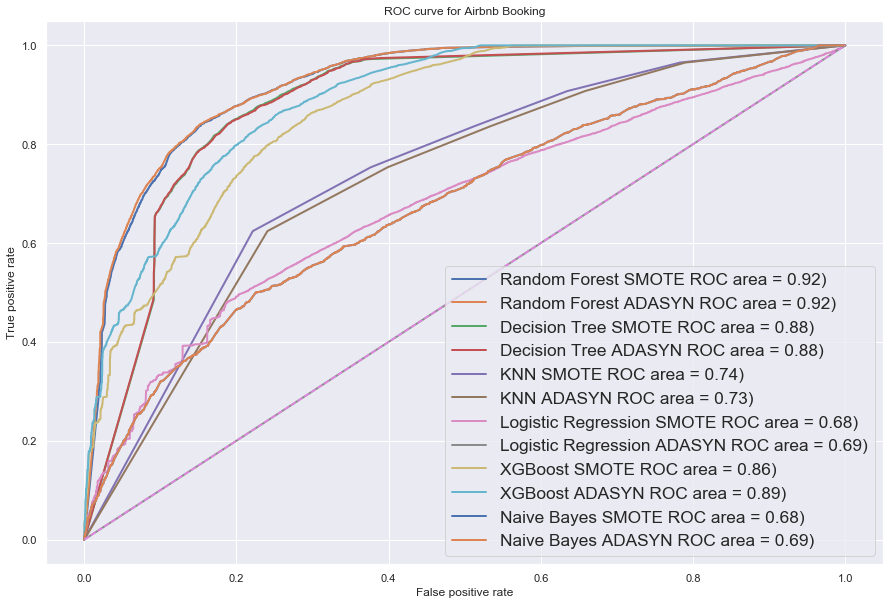

In [98]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
#random forest
plt.plot(fpr_rf1, tpr_rf1,lw=2, label='Random Forest SMOTE ROC area = %0.2f)' % roc_auc_RF1)
plt.plot(fpr_rf2, tpr_rf2,lw=2, label='Random Forest ADASYN ROC area = %0.2f)' % roc_auc_RF2)
#decision tree
plt.plot(fpr_dt1, tpr_dt1,lw=2, label='Decision Tree SMOTE ROC area = %0.2f)' % roc_auc_DT1)
plt.plot(fpr_dt2, tpr_dt2,lw=2, label='Decision Tree ADASYN ROC area = %0.2f)' % roc_auc_DT2)
#knn
plt.plot(fpr_knn1, tpr_knn1,lw=2, label='KNN SMOTE ROC area = %0.2f)' % roc_auc_KNN1)
plt.plot(fpr_knn2, tpr_knn2,lw=2, label='KNN ADASYN ROC area = %0.2f)' % roc_auc_KNN2)
#logistic regression
plt.plot(fpr_lr1, tpr_lr1,lw=2, label='Logistic Regression SMOTE ROC area = %0.2f)' % roc_auc_LR1)
plt.plot(fpr_lr2, fpr_lr2,lw=2, label='Logistic Regression ADASYN ROC area = %0.2f)' % roc_auc_LR2)
# #xgboost
plt.plot(fpr_xgb1, tpr_xgb1,lw=2, label='XGBoost SMOTE ROC area = %0.2f)' % roc_auc_XGB1)
plt.plot(fpr_xgb2, tpr_xgb2,lw=2, label='XGBoost ADASYN ROC area = %0.2f)' % roc_auc_XGB2)
#naive bayes
plt.plot(fpr_nb1, tpr_nb1,lw=2, label='Naive Bayes SMOTE ROC area = %0.2f)' % roc_auc_nb1)
plt.plot(fpr_nb2, tpr_nb2,lw=2, label='Naive Bayes ADASYN ROC area = %0.2f)' % roc_auc_nb2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc="lower right",ncol=1,fontsize = 'x-large')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Airbnb Booking');

In [96]:
from sklearn.metrics import log_loss

In [97]:
# #Random Forest
print("Log-loss Random Forest SMOTE: {:6.4f}".format(log_loss(y_smoted_val, RF.predict_proba(X_smoted_val))))
print("Log-loss Random Forest ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, RF.predict_proba(X_adasyn_val))))
#Decision Tree
print("Log-loss Decision Tree SMOTE: {:6.4f}".format(log_loss(y_smoted_val, DT.predict_proba(X_smoted_val))))
print("Log-loss Decision Tree ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, DT.predict_proba(X_adasyn_val))))
#KNN
print("Log-loss KNN SMOTE: {:6.4f}".format(log_loss(y_smoted_val, knn.predict_proba(X_smoted_val))))
print("Log-loss KNN ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, knn.predict_proba(X_adasyn_val))))
# Logistic Regression
print("Log-loss Logistic Regression SMOTE: {:6.4f}".format(log_loss(y_smoted_val, lr.predict_proba(X_smoted_val))))
print("Log-loss Logistic Regression ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, lr.predict_proba(X_adasyn_val))))
#XGBoost
print("Log-loss XGBoost SMOTE: {:6.4f}".format(log_loss(y_smoted_val, xgb.predict_proba(X_smoted_val))))
print("Log-loss XGBoost ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, xgb.predict_proba(X_adasyn_val))))
#naive bayes
print("Log-loss Naive Bayes SMOTE: {:6.4f}".format(log_loss(y_smoted_val, nb.predict_proba(X_smoted_val))))
print("Log-loss Naive Bayes ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, nb.predict_proba(X_adasyn_val))))


Log-loss Random Forest SMOTE: 0.6645
Log-loss Random Forest ADASYN: 0.6146
Log-loss Decision Tree SMOTE: 2.2344
Log-loss Decision Tree ADASYN: 2.2080
Log-loss KNN SMOTE: 4.7746
Log-loss KNN ADASYN: 5.0595
Log-loss Logistic Regression SMOTE: 0.6405
Log-loss Logistic Regression ADASYN: 0.6297
Log-loss XGBoost SMOTE: 0.4824
Log-loss XGBoost ADASYN: 0.4600
Log-loss Naive Bayes SMOTE: 0.6940
Log-loss Naive Bayes ADASYN: 0.6686


Log Loss: show the uncertainty of your prediction based on how much it varies from the actual label. 


From the result, we can tell that Random Forest with SMOTE is my best model so far. A perfect classification model has a log-loss of 0 and since Random Forest with SMOTE has the smallest log loss, we will use this. Let's try to combine the best 2 models to see if we can get a better model.

## Ensemble Methods 

In [99]:
#Ensemble methods help to minimize these factors. 
#These methods are designed to improve the stability and the accuracy of Machine Learning algorithms.
from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import (RandomForestClassifier,VotingClassifier, AdaBoostClassifier)

In [100]:
model_names=['RF','DT']

In [101]:
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))
model_list

[('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features=39, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=0, splitter='best'))]

In [102]:
#Max Voting
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_smoted_train, y_smoted_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=39,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [112]:
y_pred_Ensemble = voting_classifer.predict(X_smoted_val)
precision_score(y_smoted_val,y_pred_Ensemble)

0.8376714170475934

In [113]:
#Avg Voting
voting_classifer_avg = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer_avg.fit(X_smoted_train, y_smoted_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=39,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [114]:
y_pred_Ensemble_avg = voting_classifer_avg.predict(X_smoted_val)
precision_score(y_smoted_val,y_pred_Ensemble_avg)

0.814813863928113

In [115]:
#Weighted Voting
# create voting classifier
weights = [5.5,0.2]
voting_model_weight = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,
                                    n_jobs=-1)
voting_model_weight.fit(X_smoted_train, y_smoted_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=39,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [116]:
y_pred_Ensemble_weight = voting_model_weight.predict(X_smoted_val)
precision_score(y_smoted_val,y_pred_Ensemble_weight)

0.8248499153368567

In [117]:
#Weighted Voting
# create voting classifier
weights = [5.5,0.2]
voting_model_weight = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,
                                    n_jobs=-1)
voting_model_weight.fit(X_adasyn_train, y_adasyn_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=39,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [118]:
y_pred_Ensemble_weight_ada = voting_model_weight.predict(X_adasyn_val)
precision_score(y_adasyn_val,y_pred_Ensemble_weight_ada)

0.8427530107754068

In [119]:
#random forest
fpr_stack, tpr_stack, thresholds = roc_curve(y_smoted_val, voting_model_weight.predict_proba(X_smoted_val)[:,1])
roc_auc_stack=roc_auc_score(y_smoted_val, voting_model_weight.predict_proba(X_smoted_val)[:,1])

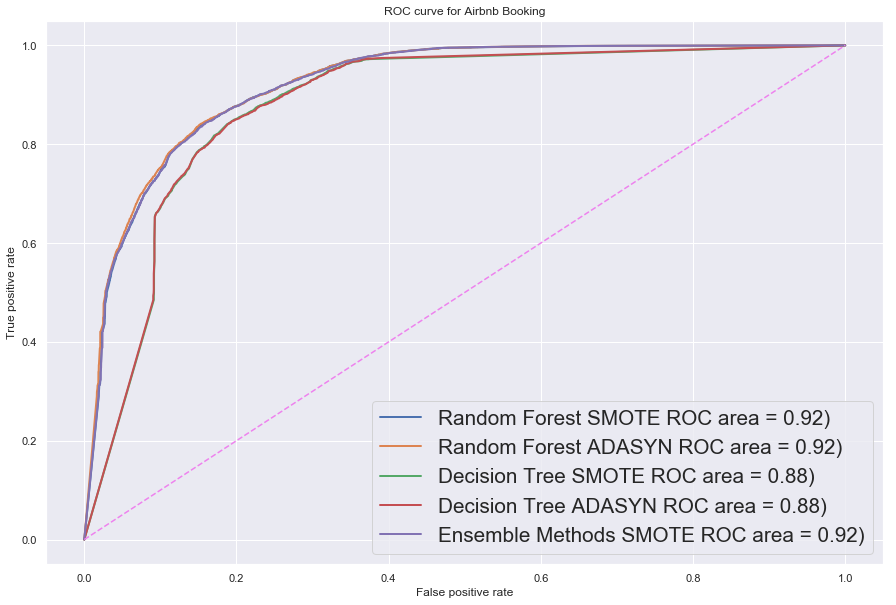

In [120]:
plt.figure(figsize=(15,10))
#random forest
plt.plot(fpr_rf1, tpr_rf1,lw=2, label='Random Forest SMOTE ROC area = %0.2f)' % roc_auc_RF1)
plt.plot(fpr_rf2, tpr_rf2,lw=2, label='Random Forest ADASYN ROC area = %0.2f)' % roc_auc_RF2)
#decision tree
plt.plot(fpr_dt1, tpr_dt1,lw=2, label='Decision Tree SMOTE ROC area = %0.2f)' % roc_auc_DT1)
plt.plot(fpr_dt2, tpr_dt2,lw=2, label='Decision Tree ADASYN ROC area = %0.2f)' % roc_auc_DT2)
#ensemble method
plt.plot(fpr_stack, tpr_stack,lw=2, label='Ensemble Methods SMOTE ROC area = %0.2f)' % roc_auc_stack)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc="lower right",ncol=1,fontsize = 'xx-large')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Airbnb Booking');

After using ensemble method, we can see that the Random Forest SMOTE model is still the best model so far. Now that we have an idea about which model perform the best in general, we can compare their precision scores.

In [123]:
rf_recall=recall_score(y_smoted_val,y_predict_rf)
rf_ada_recall=recall_score(y_adasyn_val,y_predict_rf_ada)
dt_recall=recall_score(y_smoted_val,y_pred_dt)
dt_ada_recall=recall_score(y_adasyn_val,y_pred_dt_ada)
es_recall=recall_score(y_smoted_val,y_pred_Ensemble_weight)

In [122]:
#Random Forest
log1=log_loss(y_smoted_val, RF.predict_proba(X_smoted_val))
log2=log_loss(y_adasyn_val, RF.predict_proba(X_adasyn_val))
#Decision Tree
log3=log_loss(y_smoted_val, DT.predict_proba(X_smoted_val))
log4=log_loss(y_adasyn_val, DT.predict_proba(X_adasyn_val))
#Ensemble Method
log5=log_loss(y_smoted_val, voting_model_weight.predict_proba(X_smoted_val))          

In [125]:
# initialise data of lists. 
data = {'Recall':[rf_recall,rf_ada_recall,dt_recall,dt_ada_recall,es_recall],
       'AUC':[roc_auc_RF1,roc_auc_RF2,roc_auc_DT1,roc_auc_DT2,roc_auc_stack],
       'Log-Loss':[log1,log2,log3,log4,log5]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Random Forest SMOTE', 'Random Forest ADASYN', 'Decision Tree SMOTE', 
                                'Decision Tree ADASYN','Ensemble Method']) 
  
# print the data 
df 

,Recall,AUC,Log-Loss
Random Forest SMOTE,0.851698,0.921475,0.664514
Random Forest ADASYN,0.846503,0.923540,0.614648
Decision Tree SMOTE,0.827789,0.882326,2.234421
Decision Tree ADASYN,0.821269,0.882812,2.207995
Ensemble Method,0.852201,0.921413,0.658151


Ensemble Method perform slightly better, however, since it is computationally expensive, we will still stick with Random Forest with SMOTE.

## Final Model Testing

In [127]:
#Random Forest SMOTE
from sklearn.ensemble import RandomForestClassifier
RF.fit(X_smoted_train, y_smoted_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=39, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
y_predict_rf_final = RF.predict(X_test)

In [129]:
print(metrics.classification_report(y_test, y_predict_rf_final))

              precision    recall  f1-score   support

         0.0       0.24      0.40      0.30      4377
         1.0       0.92      0.85      0.89     37728

    accuracy                           0.80     42105
   macro avg       0.58      0.62      0.59     42105
weighted avg       0.85      0.80      0.83     42105



In [130]:
recall_score(y_test,y_predict_rf_final)

0.8519932145886344